ALUNO: PEDRO NÍCOLLAS PEREIRA LEON LOPES

### 1 - Desenvolver um Projeto de Machine Learning com geração de dados automáticos com IA Generativa, baseado nos experimentos de sala de aulas com o modelo, utilizando qualquer framework web em python (Flask, Django, FastAPI, Bottle, Streamlit):
* Classificação;
<br>ou<br>
* Agrupamento de Dados (Clusterização).

In [1]:
'''
DATASET UTILIZADO -> dados_cancer.csv (../data/dados_cancer.csv)

Prompt para geração do dataset disponível em: ../prompt-GPT.png

Projeto realizado utilizando python 3.8.10
'''

'\nDATASET UTILIZADO -> dados_cancer.csv (../data/dados_cancer.csv)\n\nPrompt para geração do dataset disponível em: ../prompt-GPT.png\n\nProjeto realizado utilizando python 3.8.10\n'

In [2]:
# Conjunto de Importações
import pandas as pd
import numpy as np

In [3]:
dados = pd.read_csv("../data/dados_cancer.csv")         # leitura do .csv
dados.head()                                            # visualização do cabeçalho do .csv

,media_raio,media_textura,media_perimetro,media_area,mean_smoothness,diagnostico
0,12.66,14.76,87.01,413.25,0.07,0
1,18.25,14.86,136.96,705.45,0.09,1
2,13.75,20.48,73.68,454.91,0.10,0
3,8.93,21.39,79.32,567.75,0.09,0
4,19.33,17.35,110.30,1517.62,0.12,1


In [4]:
dados.isna().sum()              # checagem de NAN'S no dataset -> 0
dados.dtypes                    # Visualização dos tipos dos dados

media_raio         float64
media_textura      float64
media_perimetro    float64
media_area         float64
mean_smoothness    float64
diagnostico          int64
dtype: object

*NORMALIZANDO OS DADOS*

In [5]:
from sklearn.preprocessing import MinMaxScaler              # import do sklearn para usar MinMaxScaler
normalizador = MinMaxScaler(feature_range=(0,1))            # instancia do MinMaxScaler

In [6]:
colunas_para_normalizar = ['media_raio','media_textura', 'media_perimetro', 'media_area', 'mean_smoothness']

# Normalização dos valores para entre -1 e 1
for col in colunas_para_normalizar:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))

dados.head()            # cabeçalho do .csv (com dados normalizados)

,media_raio,media_textura,media_perimetro,media_area,mean_smoothness,diagnostico
0,0.325191,0.211588,0.285291,0.135251,0.142857,0
1,0.609669,0.215880,0.696199,0.289609,0.428571,1
2,0.380662,0.457082,0.175633,0.157258,0.571429,0
3,0.135369,0.496137,0.222030,0.216867,0.428571,0
4,0.664631,0.322747,0.476884,0.718648,0.857143,1


*Separando a base de dados em amostras de treino e teste*

In [7]:
from sklearn.model_selection import train_test_split            # import do "train_test_split" do sklearn para realizar o treinamento

# Atribuindo valores para X e Y (alvo)
X = dados.drop(['diagnostico'], axis=1).values          # Seleção das features de seleção (exclusão de "diagnostico", o alvo e "genero", que não possui correlação com o resto dos dados)
Y = dados['diagnostico'].values                         # Variável alvo

In [8]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.30,random_state=0)           # 30% teste e 70% treino

*Aplicando modelo Decision Tree Classifier*

In [9]:
from sklearn.tree import DecisionTreeClassifier         # import para utilizar DecisionTreeClassifier()
modelo_DT_cancer = DecisionTreeClassifier()             # utilização do DecisionTreeClassifier

In [10]:
modelo_DT_cancer.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino

DecisionTreeClassifier()

In [11]:
Y_previsto = modelo_DT_cancer.predict(X_teste)           # realização de previsões com a amostra de teste

*RESULTADOS (Matriz de Confusão e Acurária)*

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score            # métricas de avaliação
import seaborn as sns                                                   # plotagem da matrix de confusão

In [13]:
# Matriz de Confusão
confusion_matrix(Y_teste, Y_previsto)           # console

array([[156,   3],
       [  8, 133]], dtype=int64)

<Axes: >

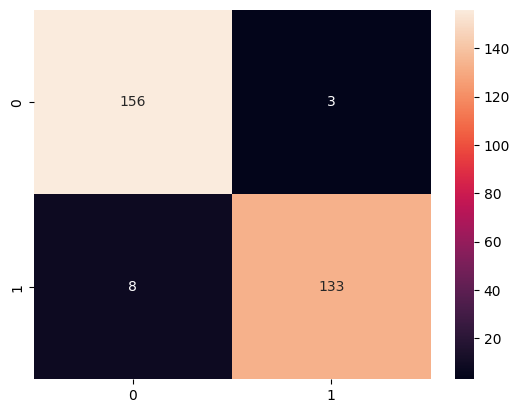

In [14]:
# Plottagem atriz de Confusão
cm = confusion_matrix(Y_teste,Y_previsto)
sns.heatmap(cm,annot=True, fmt="d")

In [15]:
# ACCURACY:                                             -> 96%
accuracy = accuracy_score(Y_teste, Y_previsto)
print(f"ACCURACY: {accuracy:.2f}")

ACCURACY: 0.96


*Persistência do Modelo (.pkl)*

In [16]:
import joblib                                                           # importação do joblib para salvar o modelo em .pkl
joblib.dump(modelo_DT_cancer, '../modelo/modelo_RL_bank.pkl')           # (.pkl)

['../modelo/modelo_RL_bank.pkl']